In [ ]:
#Determining Trustworthiness of Data in IoT Crowd Sensing Environments 

In [1]:
import json
from math import sin, cos, sqrt, atan2, radians
with open('F:\Project material\TTT\opdata\\reportcollision17-18.json') as a:
    collision = json.load(a)

with open('F:\Project material\TTT\opdata\\userVotedData.json') as b:
    voting = json.load(b)
    
with open('F:\Project material\TTT\opdata\\usersdata.json') as c:
    users = json.load(c)

In [2]:
import pandas as pd
df_voting = pd.DataFrame(voting)
# list(tusers)

In [3]:
df_voting.to_excel('C:\\Users\OMKAR\Desktop\VotingData.xlsx')

In [4]:
import pandas as pd
df_collision = pd.DataFrame(collision)
#df_user = pd.DataFrame(users)

In [5]:
df_collision.to_excel('C:\\Users\OMKAR\Desktop\CollisionData.xlsx')
#df_user.to_excel('C:\\Users\OMKAR\Desktop\UserData.xlsx')

In [6]:
#store users input data in csv format using pandas
import pandas as pd
df_input = pd.DataFrame(users)
# list(tusers)

In [7]:
df_input.head(50)

,latitude,longitude,userExperience,userId,userIteration,userPayoff,userReputation,userReputationExp,userVelocity,userVoting,usertrustWorthiness
0,53.398133,-6.250714,0.5,u2000059,9,0,1,1,2.5,1,2
1,53.398337,-6.252587,0.3,u2000058,6,0,1,1,28.0,3,1
2,53.398567,-6.250699,0.8,u2001036,5,0,1,1,30.0,3,3
3,53.398580,-6.250749,0.4,u2005031,4,0,1,1,36.0,1,1
4,53.398731,-6.253925,0.6,u2006312,7,0,1,1,10.0,4,4
5,53.397241,-6.251758,0.3,u2004745,8,0,1,1,35.0,5,5
6,53.397774,-6.251547,0.8,u2001235,6,0,1,1,50.0,1,3
7,53.397781,-6.251616,0.7,u2006837,3,0,1,1,90.0,3,5
8,53.397877,-6.251349,0.5,u2002690,9,0,1,1,15.0,5,5
9,53.398213,-6.251917,0.6,u2006669,4,0,1,1,38.0,5,5


In [8]:
df_input.to_excel('C:\\Users\OMKAR\Desktop\Input1.xlsx')

In [9]:
def searchUserindex(users, Name):
    IndexOfUser = 0
    index = 0
    for user in users:
        if user['userId'] == Name:
            IndexOfUser = index
            break
        index = index + 1
    return IndexOfUser

In [10]:
searchUserindex(users, 'u2006180')

17

In [11]:
users[49]['userExperience']

0.6

In [12]:
def user_Experience(users):
    k=0
    maxExp=1
    minExp=1
    alpha=0.1
    for user in users:
        if k<len(users):
            newExperience= users[k]['userExperience']+(alpha*users[k]['userIteration']*(1-users[k]['userExperience']))
            #print(tusers[k]['userId'],"%.2f" % newExperience,tusers[k]['userExperience'])
            k=k+1
            UI = searchUserindex(users, user['userId'])
            users[UI]['userExperience'] = newExperience
            #print(UI)
            #print(newExperience)
    return users    
   
    

In [13]:
def user_TrustWorthiness(users, Name):
    user_trustValue = 0
    for user in users:
        if user['userId'] == Name:
            user_trustValue = user['usertrustWorthiness']
            break

    return user_trustValue

In [57]:
from geopy.distance import vincenty
def DistanceBetweenUsers(root_user, SecondUser):
    user1lattitude = radians(root_user['latitude'])
    user1longitude = radians(root_user['longitude'])
    user2lattitude = radians(SecondUser['latitude'])
    user2longitude = radians(SecondUser['longitude'])
    a = (user1lattitude, user1longitude)
    b  = (user2lattitude,user2longitude)
    distance = vincenty(a, b, miles=True)
    #print ("Result:" + str(distance))
    return distance


In [15]:
len(users)

50

In [16]:
#IMPLEMENTATION OF REK MODEL

In [17]:
#REPUTATION CALCULATION BASED ON EXPERIENCE

In [18]:
def experienceReputation(users):
    r=0
    sor=0
    sumofPositiveReputation=0
    sumofNegativeReputation=0
    negativeExperience=0
    positiveExperience=0
    damping=0.75
    sor1=0
    e=0
    sor2=0
    sum1=0
    sum2=0
    for user in users:
        if r<len(users):   
            if(users[r]['userExperience']>0.75):
                sumofPositiveReputation+=users[r]['userReputationExp']
                positiveExperience+=users[r]['userExperience']
                sor1=0.012+damping*(sumofPositiveReputation*(users[r]['userExperience']/positiveExperience))
               #print(sor1)
            else:
                sumofNegativeReputation+=users[r]['userReputationExp']
                negativeExperience+=users[r]['userExperience']
                sor2=0.012+damping*(sumofNegativeReputation*((1-users[r]['userExperience'])/negativeExperience))

            sor=(sor1-sor2)*10
            r=r+1
          # print(user['userId'])
            UI= searchUserindex(users, user['userId'])
            users[UI]['userReputationExp'] = sor
           
    return users
       
#As Reputation of each user is set to 1 initially
#he SUM of Reputation for all users is 50
    
    


In [19]:
users =user_Experience(users)
#print (users)
# for a in tusers:
#     print (a['userId'])
#print(users)

In [20]:
users = experienceReputation(users)
#print (users)
for user in users:
    print ('UserExperience:',user['userExperience'],'Reputation Exp:',user['userReputationExp'])

UserExperience: 0.95 Reputation Exp: 7.62
UserExperience: 0.72 Reputation Exp: 4.583333333333332
UserExperience: 0.9 Reputation Exp: 4.3806306306306295
UserExperience: 0.64 Reputation Exp: 3.326709062003179
UserExperience: 0.88 Reputation Exp: 3.282159017453136
UserExperience: 0.8599999999999999 Reputation Exp: 3.2160412911682768
UserExperience: 0.92 Reputation Exp: 3.679079170470849
UserExperience: 0.79 Reputation Exp: 2.736958934517204
UserExperience: 0.95 Reputation Exp: 4.009411764705883
UserExperience: 0.76 Reputation Exp: 2.534404632038264
UserExperience: 0.8400000000000001 Reputation Exp: 3.2523417010116153
UserExperience: 0.76 Reputation Exp: 2.6496208239393324
UserExperience: 0.91 Reputation Exp: 3.915441176470588
UserExperience: 0.8400000000000001 Reputation Exp: 3.3267090620031814
UserExperience: 0.95 Reputation Exp: 4.219066937119677
UserExperience: 0.79 Reputation Exp: 2.8847836655323302
UserExperience: 0.75 Reputation Exp: 4.189495123575263
UserExperience: 0.76 Reputation

In [21]:
#Badge calculation based on Experience
def BadgeExp(users):
    for user in users:
        print( user['userReputationExp'])
        if user['userReputationExp'] > 2:
            user['badgeExp'] = 'Hi-award'
        else:
            user['badgeExp'] = 'Lo-award'
    return users

In [22]:
BadgeExp= BadgeExp(users)
print (BadgeExp)

7.62
4.583333333333332
4.3806306306306295
3.326709062003179
3.282159017453136
3.2160412911682768
3.679079170470849
2.736958934517204
4.009411764705883
2.534404632038264
3.2523417010116153
2.6496208239393324
3.915441176470588
3.3267090620031814
4.219066937119677
2.8847836655323302
4.189495123575263
3.9826457732931395
1.0378355276435625
2.3195962015001115
1.0582737479182347
1.350801227751981
2.3791466185040466
2.6838414986359096
1.7311553744355335
2.7349399528632015
1.4828818777247477
4.755201443849069
4.053078999807162
1.6189143677876294
4.021774149428293
4.842760980470154
3.309877750793115
4.496072983516688
4.55400272437857
4.854116234967588
3.24898831561514
4.947690058988322
0.3354226331724086
2.1069593697174582
1.9960493855892758
1.1435674112979588
1.0660497140333547
2.7283972750089633
3.7357019064124772
5.169664170563422
1.2273586406198678
5.158568427200224
4.72024555304581
3.459563768494168
[{'userId': 'u2000059', 'latitude': 53.3981325, 'longitude': -6.2507142, 'usertrustWorthines

In [23]:
#IMPLEMENTATION OF SONATA MODEL

In [24]:
#TRUSTWORTHINESS OF DATA BASED ON SONATA

In [25]:
def Determine_Trustworthiness(x):
    I=0
    for a in x:
        A,B = 0,0
        voteOfMainUser = a[a['UserId']]
        if I < len(users):
            A += voteOfMainUser * users[I]['userVoting'] *user_TrustWorthiness(users,users[I]['userId'])
            B += users[I]['userVoting'] *user_TrustWorthiness(users, users[I]['userId'])
            I = I + 1
            if B!=0:
                new_user_TrustWorthiness = A/B
            IndexOfUser = searchUserindex(users, a['UserId'])
            users[IndexOfUser]['usertrustWorthiness'] = new_user_TrustWorthiness 
    return users
#print(len(tusers))

In [26]:
trustworthiness = Determine_Trustworthiness(voting)
for a in trustworthiness:
    print ('User:',a['userId'],'trustworthiness:',a['usertrustWorthiness'])
#print(trustworthiness)

User: u2000059 trustworthiness: 1.0
User: u2000058 trustworthiness: 1.0
User: u2001036 trustworthiness: -1.0
User: u2005031 trustworthiness: -1.0
User: u2006312 trustworthiness: 0.0
User: u2004745 trustworthiness: 1.0
User: u2001235 trustworthiness: 1.0
User: u2006837 trustworthiness: 1.0
User: u2002690 trustworthiness: 1.0
User: u2006669 trustworthiness: 1.0
User: u2007112 trustworthiness: 0.0
User: u2000163 trustworthiness: 0.0
User: u2009312 trustworthiness: -1.0
User: u2008617 trustworthiness: -1.0
User: u2008037 trustworthiness: 1.0
User: u2006367 trustworthiness: -1.0
User: u2007456 trustworthiness: 0.0
User: u2006180 trustworthiness: 0.0
User: u2009933 trustworthiness: 1.0
User: u2001697 trustworthiness: 0.0
User: u2000466 trustworthiness: -1.0
User: u2004046 trustworthiness: 0.0
User: u2006446 trustworthiness: -1.0
User: u2005192 trustworthiness: 0.0
User: u2000077 trustworthiness: -1.0
User: u2006352 trustworthiness: 1.0
User: u2000852 trustworthiness: 1.0
User: u2007892 trust

In [27]:
#PAY OFF CALCULATION BASED ON THE VOTES SUBMITTED BY USER

In [54]:
def Decide_Payoff(voting, users):
    t=0
    for user in voting:
        t=t+1
        root_user = UserSearch(users, user['UserId'])
        SecondUser = {}
        for element, value in user.items():
            if(element != user['UserId'] and element != 'reportId' and element != 'UserId'):
                SecondUser = UserSearch(users, element)
                root_userindex = searchUserindex(users,user['UserId'])
                SecondUserindex = searchUserindex(users, element)
                
                if(DistanceBetweenUsers(root_user, SecondUser) > 1.615 and SecondUser['userVelocity'] > 35):
                    #print(DistanceBetweenUsers(root_user, SecondUser))
                    users[root_userindex]['userPayoff'] = users[root_userindex]['userPayoff'] + 1
                    users[SecondUserindex]['userPayoff'] = users[SecondUserindex]['userPayoff'] + 1
                else:
                    #print(DistanceBetweenUsers(root_user, SecondUser))
                    users[root_userindex]['userPayoff'] = users[root_userindex]['userPayoff'] - 1
                    users[SecondUserindex]['userPayoff'] = users[SecondUserindex]['userPayoff'] - 1
    return users

In [55]:
def UserSearch(users, userName):
    x = {}
    #print ("userserachcalled")
    for user in users:
        if (user['userId']) == userName:
            x = user
            break
    return x

In [58]:
payoffUsers = Decide_Payoff(voting, users)
for a in payoffUsers:
    print ('User:',a['userId'],'Payoff:',a['userPayoff'])
#print (payoffUsers)

C:\Users\OMKAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if __name__ == '__main__':


User: u2000059 Payoff: -249
User: u2000058 Payoff: -272
User: u2001036 Payoff: -248
User: u2005031 Payoff: -26
User: u2006312 Payoff: -266
User: u2004745 Payoff: -266
User: u2001235 Payoff: -86
User: u2006837 Payoff: -86
User: u2002690 Payoff: -266
User: u2006669 Payoff: -86
User: u2007112 Payoff: -92
User: u2000163 Payoff: -236
User: u2009312 Payoff: -242
User: u2008617 Payoff: -92
User: u2008037 Payoff: -2
User: u2006367 Payoff: -44
User: u2007456 Payoff: -2
User: u2006180 Payoff: -248
User: u2009933 Payoff: -8
User: u2001697 Payoff: 10
User: u2000466 Payoff: 58
User: u2004046 Payoff: 34
User: u2006446 Payoff: -62
User: u2005192 Payoff: -68
User: u2000077 Payoff: -62
User: u2006352 Payoff: -26
User: u2000852 Payoff: -92
User: u2007892 Payoff: -62
User: u2000767 Payoff: -14
User: u2004253 Payoff: -194
User: u2005246 Payoff: -62
User: u2000053 Payoff: 70
User: u2000046 Payoff: 10
User: u2001073 Payoff: -14
User: u2000087 Payoff: -200
User: u2000093 Payoff: -212
User: u2001087 Payoff: 3

In [59]:
#REPUTATION CALCULATION OF USER BASED ON VOTES 

In [60]:
from geopy.distance import vincenty
def Reputation(x, users):
    for a in x:
        root_user = UserSearch(users, a['UserId'])
        SecondUser = {}
        similarity = 0
        root_userVote = a[a['UserId']]
        for element, value in a.items():
            if(element != a['UserId'] and element != 'reportId' and element != 'UserId'):
                SecondUser = UserSearch(users, element)
                root_userindex = searchUserindex(users,a['UserId'])
                SecondUserindex = searchUserindex(users, element)
                if root_userVote != 0: 
                    similaritycalc = (DistanceBetweenUsers(root_user, SecondUser)/ root_userVote)
                    if(similaritycalc > 1.615):                        
                        similarity = -1
                    else:
                        similarity = 1


                    SecondUser['userVoting'] += similarity/root_userVote
                    SecondUser['userVoting'] = SecondUser['userVoting'] * -1
                    SecondUser['userReputation'] = SecondUser['userReputation'] + SecondUser['userVoting']
    return users

In [61]:
repuataionUsers = Reputation(voting, users)
for a in repuataionUsers:
    print ('User:',a['userId'],'ReputationVot:',a['userReputation'])
#print (repuataionUsers)
#badge Rewarding

User: u2000059 ReputationVot: 11.0
User: u2000058 ReputationVot: 11.0
User: u2001036 ReputationVot: 7.0
User: u2005031 ReputationVot: 9.0
User: u2006312 ReputationVot: 8.0
User: u2004745 ReputationVot: 11.0
User: u2001235 ReputationVot: 11.0
User: u2006837 ReputationVot: 11.0
User: u2002690 ReputationVot: 11.0
User: u2006669 ReputationVot: 11.0
User: u2007112 ReputationVot: 7.0
User: u2000163 ReputationVot: 6.0
User: u2009312 ReputationVot: 9.0
User: u2008617 ReputationVot: 9.0
User: u2008037 ReputationVot: 13.0
User: u2006367 ReputationVot: 15.0
User: u2007456 ReputationVot: 11.0
User: u2006180 ReputationVot: 9.0
User: u2009933 ReputationVot: 13.0
User: u2001697 ReputationVot: 17.0
User: u2000466 ReputationVot: 15.0
User: u2004046 ReputationVot: 10.0
User: u2006446 ReputationVot: 11.0
User: u2005192 ReputationVot: 5.0
User: u2000077 ReputationVot: 11.0
User: u2006352 ReputationVot: 15.0
User: u2000852 ReputationVot: 11.0
User: u2007892 ReputationVot: 11.0
User: u2000767 ReputationVot:

C:\Users\OMKAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if __name__ == '__main__':


In [62]:
#REWARDING BASED ON VOTING MECHANISM

In [63]:

def BadgeVot(users):
    for a in users:
        #print( user['userReputation'])
        if a['userReputation'] > 10:
            a['badgeVot'] = 'Hi-award'
        else:
            a['badgeVot'] = 'Lo-award'
    return users

In [64]:
badgeVot = BadgeVot(users)
#print (badgeVot)
for a in badgeVot:
    print ('User:',a['userId'],'BadgeVot:',a['badgeVot'])

User: u2000059 BadgeVot: Hi-award
User: u2000058 BadgeVot: Hi-award
User: u2001036 BadgeVot: Lo-award
User: u2005031 BadgeVot: Lo-award
User: u2006312 BadgeVot: Lo-award
User: u2004745 BadgeVot: Hi-award
User: u2001235 BadgeVot: Hi-award
User: u2006837 BadgeVot: Hi-award
User: u2002690 BadgeVot: Hi-award
User: u2006669 BadgeVot: Hi-award
User: u2007112 BadgeVot: Lo-award
User: u2000163 BadgeVot: Lo-award
User: u2009312 BadgeVot: Lo-award
User: u2008617 BadgeVot: Lo-award
User: u2008037 BadgeVot: Hi-award
User: u2006367 BadgeVot: Hi-award
User: u2007456 BadgeVot: Hi-award
User: u2006180 BadgeVot: Lo-award
User: u2009933 BadgeVot: Hi-award
User: u2001697 BadgeVot: Hi-award
User: u2000466 BadgeVot: Hi-award
User: u2004046 BadgeVot: Lo-award
User: u2006446 BadgeVot: Hi-award
User: u2005192 BadgeVot: Lo-award
User: u2000077 BadgeVot: Hi-award
User: u2006352 BadgeVot: Hi-award
User: u2000852 BadgeVot: Hi-award
User: u2007892 BadgeVot: Hi-award
User: u2000767 BadgeVot: Hi-award
User: u2004253

In [65]:
for a in users:
    print ('User:',a['userId'],'lat:',a['latitude'],'lot:',a['longitude'],'trust:',a['usertrustWorthiness'],'Exp:',a['userExperience'],'It:',user['userIteration'],'RepEx:',a['userReputationExp'],'BaEx:',a['badgeExp'],'RepVot:',a['userReputation'],'BadgeVot:',a['badgeVot'])

User: u2000059 lat: 53.3981325 lot: -6.2507142 trust: 1.0 Exp: 0.95 It: 4 RepEx: 7.62 BaEx: Hi-award RepVot: 11.0 BadgeVot: Hi-award
User: u2000058 lat: 53.3983368 lot: -6.2525866 trust: 1.0 Exp: 0.72 It: 4 RepEx: 4.583333333333332 BaEx: Hi-award RepVot: 11.0 BadgeVot: Hi-award
User: u2001036 lat: 53.3985666 lot: -6.2506987 trust: -1.0 Exp: 0.9 It: 4 RepEx: 4.3806306306306295 BaEx: Hi-award RepVot: 7.0 BadgeVot: Lo-award
User: u2005031 lat: 53.3985802 lot: -6.2507491 trust: -1.0 Exp: 0.64 It: 4 RepEx: 3.326709062003179 BaEx: Hi-award RepVot: 9.0 BadgeVot: Lo-award
User: u2006312 lat: 53.3987313 lot: -6.2539245 trust: 0.0 Exp: 0.88 It: 4 RepEx: 3.282159017453136 BaEx: Hi-award RepVot: 8.0 BadgeVot: Lo-award
User: u2004745 lat: 53.3972409 lot: -6.2517581 trust: 1.0 Exp: 0.8599999999999999 It: 4 RepEx: 3.2160412911682768 BaEx: Hi-award RepVot: 11.0 BadgeVot: Hi-award
User: u2001235 lat: 53.3977738 lot: -6.2515468 trust: 1.0 Exp: 0.92 It: 4 RepEx: 3.679079170470849 BaEx: Hi-award RepVot: 1

In [66]:
users =Determine_Trustworthiness(voting)
#print (users)

# for a in tusers:
#     print (a['userId'])
#print(tusers)

In [67]:
print(users)

[{'userId': 'u2000059', 'latitude': 53.3981325, 'longitude': -6.2507142, 'usertrustWorthiness': 1.0, 'userPayoff': -249, 'userVoting': 1.0, 'userExperience': 0.95, 'userIteration': 9, 'userVelocity': 2.5, 'userReputation': 11.0, 'userReputationExp': 7.62, 'badgeExp': 'Hi-award', 'badgeVot': 'Hi-award'}, {'userId': 'u2000058', 'latitude': 53.3983368, 'longitude': -6.2525866, 'usertrustWorthiness': 1.0, 'userPayoff': -272, 'userVoting': 5.0, 'userExperience': 0.72, 'userIteration': 6, 'userVelocity': 28, 'userReputation': 11.0, 'userReputationExp': 4.583333333333332, 'badgeExp': 'Hi-award', 'badgeVot': 'Hi-award'}, {'userId': 'u2001036', 'latitude': 53.3985666, 'longitude': -6.2506987, 'usertrustWorthiness': -1.0, 'userPayoff': -248, 'userVoting': -1.0, 'userExperience': 0.9, 'userIteration': 5, 'userVelocity': 30, 'userReputation': 7.0, 'userReputationExp': 4.3806306306306295, 'badgeExp': 'Hi-award', 'badgeVot': 'Lo-award'}, {'userId': 'u2005031', 'latitude': 53.3985802, 'longitude': -6

In [68]:
#STORING RESULTS IN OUTPUT FILE

In [69]:
import pandas as pd

df_output = pd.DataFrame(users)
# list(users)

In [70]:
df_output['userReputationExp'] = df_output['userReputationExp'].round(3)

In [71]:
df_output.head(50)

,badgeExp,badgeVot,latitude,longitude,userExperience,userId,userIteration,userPayoff,userReputation,userReputationExp,userVelocity,userVoting,usertrustWorthiness
0,Hi-award,Hi-award,53.398133,-6.250714,0.95,u2000059,9,-249,11.0,7.620,2.5,1.0,1.0
1,Hi-award,Hi-award,53.398337,-6.252587,0.72,u2000058,6,-272,11.0,4.583,28.0,5.0,1.0
2,Hi-award,Lo-award,53.398567,-6.250699,0.90,u2001036,5,-248,7.0,4.381,30.0,-1.0,-1.0
3,Hi-award,Lo-award,53.398580,-6.250749,0.64,u2005031,4,-26,9.0,3.327,36.0,-1.0,-1.0
4,Hi-award,Lo-award,53.398731,-6.253925,0.88,u2006312,7,-266,8.0,3.282,10.0,-1.0,-1.0
5,Hi-award,Hi-award,53.397241,-6.251758,0.86,u2004745,8,-266,11.0,3.216,35.0,7.0,1.0
6,Hi-award,Hi-award,53.397774,-6.251547,0.92,u2001235,6,-86,11.0,3.679,50.0,3.0,1.0
7,Hi-award,Hi-award,53.397781,-6.251616,0.79,u2006837,3,-86,11.0,2.737,90.0,5.0,1.0
8,Hi-award,Hi-award,53.397877,-6.251349,0.95,u2002690,9,-266,11.0,4.009,15.0,7.0,1.0
9,Hi-award,Hi-award,53.398213,-6.251917,0.76,u2006669,4,-86,11.0,2.534,38.0,7.0,1.0


In [72]:
df_output.to_excel('C:\\Users\OMKAR\Desktop\Outputiteration2.xlsx')

In [73]:
df_input["userId"].head()

0    u2000059
1    u2000058
2    u2001036
3    u2005031
4    u2006312
Name: userId, dtype: object

In [74]:
df_output["userExperience"].head()

0    0.95
1    0.72
2    0.90
3    0.64
4    0.88
Name: userExperience, dtype: float64

In [75]:
df_input["userExperience"].head()

0    0.5
1    0.3
2    0.8
3    0.4
4    0.6
Name: userExperience, dtype: float64

In [76]:
##PlOT THE RESULTS FOR COMAPARISON BETWEEN INPUT AND OUTPUT FOR TWO MODELS

In [ ]:
#ANALYSIS and COMAPRISON OF USer experience of REK MODEL with respect to input data

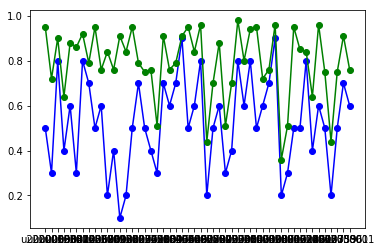

In [82]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
# data
#df=pd.DataFrame({'x':range(1,50)})

# plot
plt.plot( df_output["userId"],  df_input["userExperience"], linestyle='-', marker='o',  c='blue')
plt.plot( df_output["userId"],  df_output["userExperience"], linestyle='-', marker='o', c='green')
plt.show()

In [ ]:
#ANALYSIS and COMAPRISON OF Pay0ff of SONATA MODEL with respect to input data

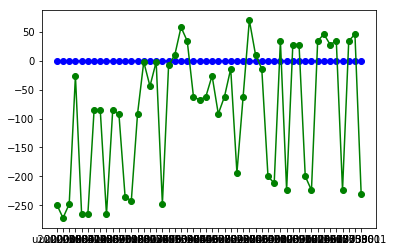

In [78]:
plt.plot( df_output["userId"],  df_input["userPayoff"], linestyle='-', marker='o',  c='blue')
plt.plot( df_output["userId"],  df_output["userPayoff"], linestyle='-', marker='o', c='green')
plt.show()

In [ ]:
#ANALYSIS and COMAPRISON OF trustworthiness of SONATA MODEL with respect to input data

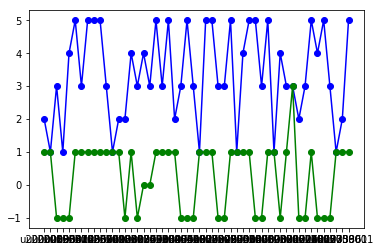

In [79]:
plt.plot( df_output["userId"],  df_input["usertrustWorthiness"], linestyle='-', marker='o',  c='blue')
plt.plot( df_output["userId"],  df_output["usertrustWorthiness"], linestyle='-', marker='o', c='green')
plt.show()

In [ ]:
#ANALYSIS and COMAPRISON OF REPUTATION FROM BOTH MODELS WITH INITIAL VALUE OF REPUTATION WHICH WAS SET TO 1

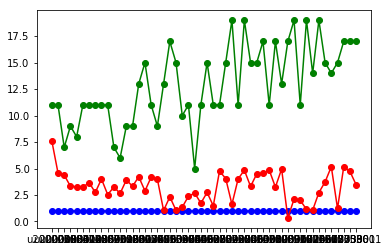

In [80]:
plt.plot( df_output["userId"],  df_input["userReputation"], linestyle='-', marker='o',  c='blue')
plt.plot( df_output["userId"],  df_output["userReputation"], linestyle='-', marker='o', c='green')
plt.plot( df_output["userId"],  df_output["userReputationExp"], linestyle='-', marker='o',  c='red')
plt.show()
plt.show()

In [ ]:
#ANALYSIS and COMAPRISON OF Voting capacity of SONATA MODEL with respect to input data

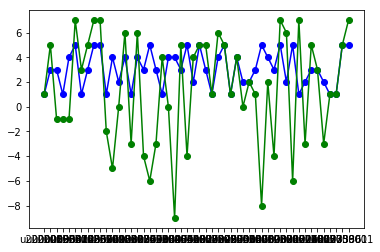

In [81]:
plt.plot( df_output["userId"], df_input["userVoting"], linestyle='-', marker='o',  c='blue')
plt.plot( df_output["userId"],  df_output["userVoting"], linestyle='-', marker='o', c='green')
plt.show()